<a href="https://colab.research.google.com/github/dawidstajszczyk/thesis_APO/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

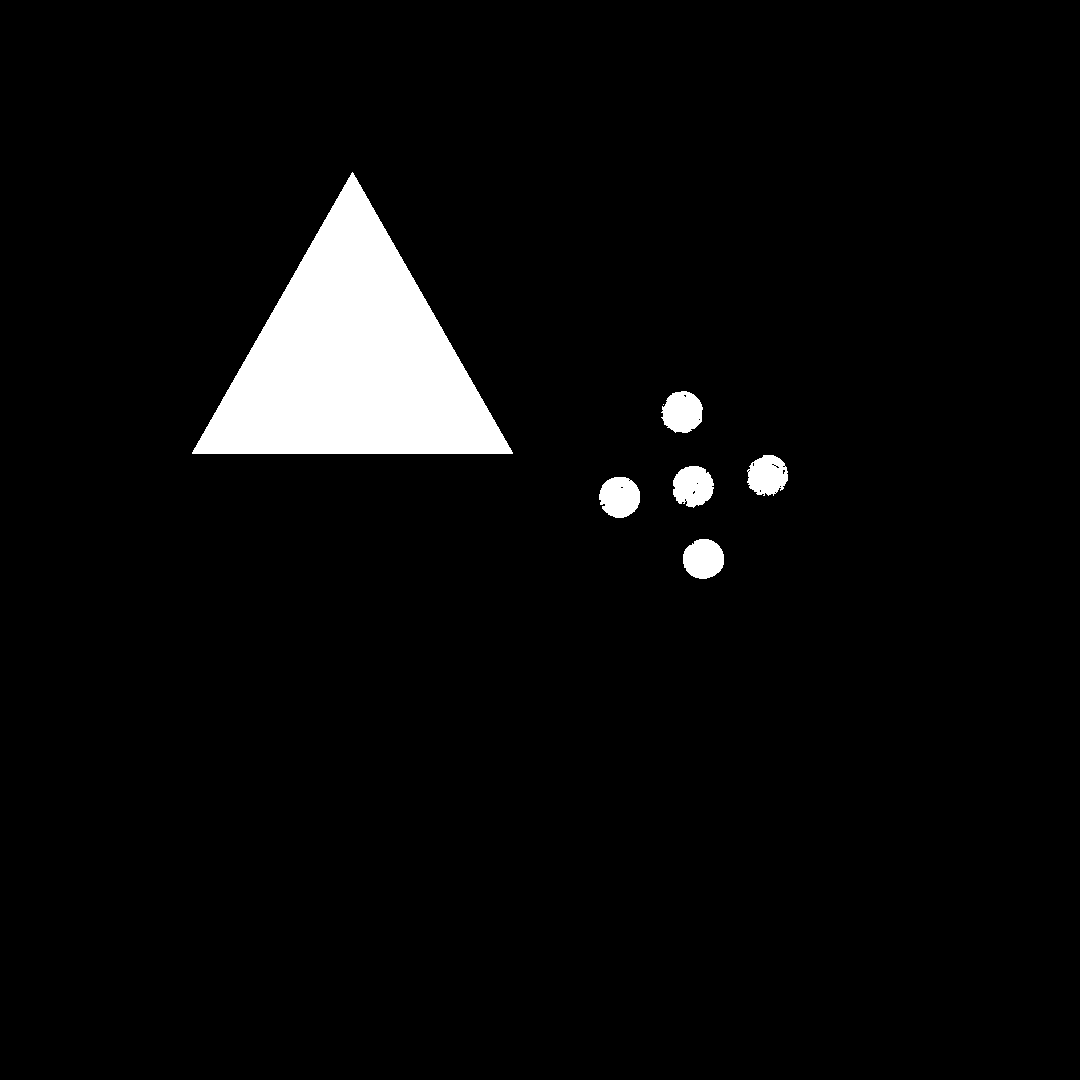

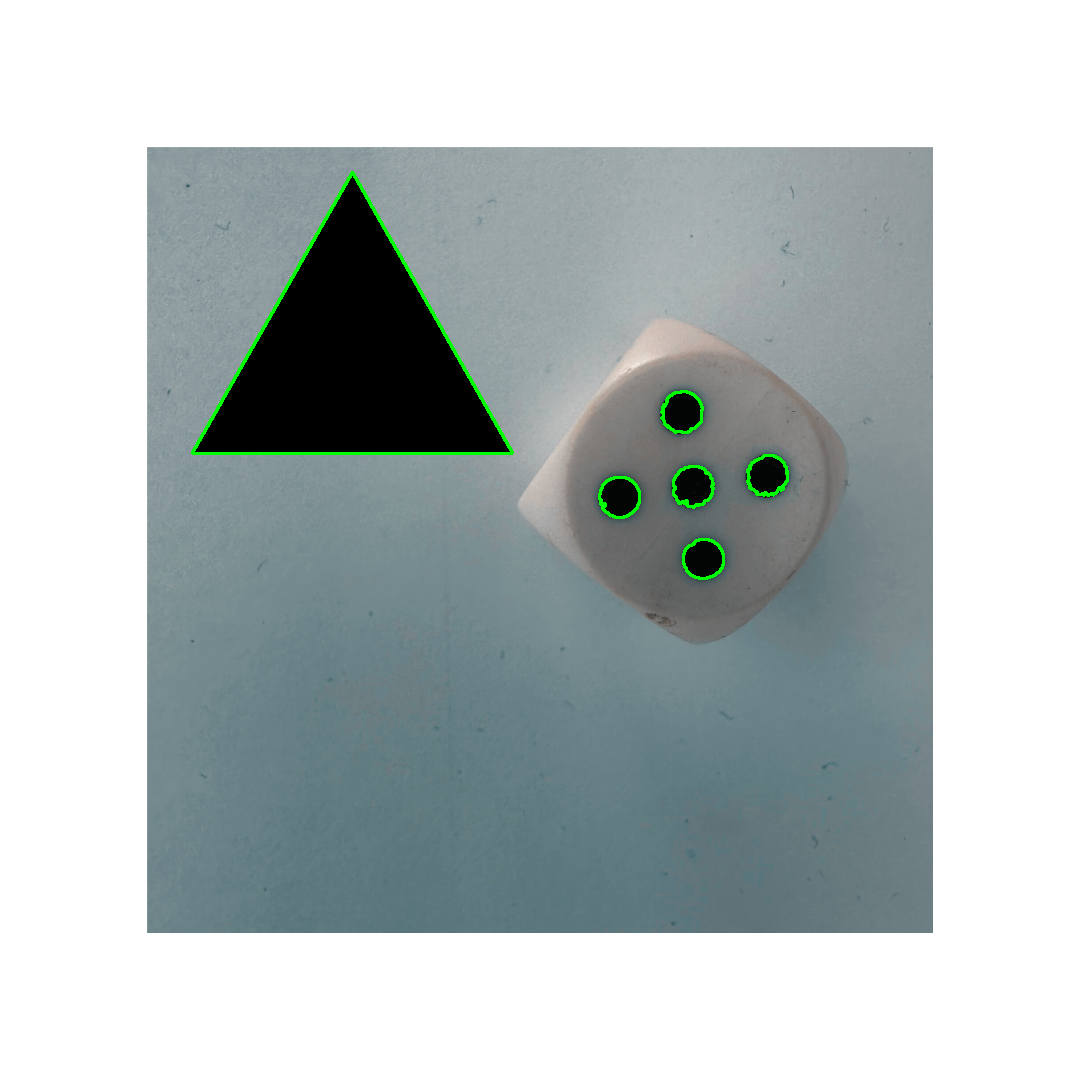

Liczba czarnych kropek: 4


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def count_black_dots(image_path):
    # Wczytanie obrazu
    image = cv2.imread(image_path)

    # Przekształcenie obrazu na odcienie szarości
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binaryzacja obrazu (czarne kropki będą miały wartość 0)
    _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)

    # Rozmycie Gaussowskie w celu wygładzenia krawędzi
    blurred = cv2.GaussianBlur(binary, (5, 5), 0)

    # Znalezienie konturów
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # Utworzenie kopii obrazu, na którym będą rysowane kontury czarnych kropek
    dots_image = image.copy()
    cv2.drawContours(dots_image, contours, -1, (0, 255, 0), 2)
    # Zliczenie czarnych kropek
    black_dot_count = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 50:  # Minimalna wielkość obszaru, aby uznać go za czarną kropkę
            continue

        # Sprawdzenie, czy kontur jest zbliżony do kształtu okręgu
        perimeter = cv2.arcLength(contour, True)
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.6:  # Określ próg, powyżej którego uznajemy kształt za okrągły
            # Rysowanie konturu na obrazie z kropkami
            cv2.drawContours(dots_image, [contour], -1, (0, 255, 0), 2)
            black_dot_count += 1

    # Wyświetlenie obrazu z konturami czarnych kropek
    cv2_imshow(dots_image)

    return black_dot_count

# Ścieżka do zdjęcia
image_path = "/content/Untitled design (2).png"

# Zliczenie czarnych kropek
dots_count = count_black_dots(image_path)
print("Liczba czarnych kropek:", dots_count)


1. Wczytaj obraz
2. Wykonaj konwersję do skali szarości
3. Wykonaj binaryzację
4. Znajdź kontury
5. Zlicz kontur o dostatecznie dużym polu powierzchni i kolistości.
